In [1]:
import pandas as pd

df = pd.read_csv(r'dataset/accidents_2017.csv')
df.head()

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
0,2017S008429,Unknown,Unknown,Número 27 ...,Friday,October,13,8,Morning,2,0,2,2,2.125624,41.340045
1,2017S007316,Unknown,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,Morning,2,0,2,2,2.120452,41.339426
2,2017S010210,Unknown,Unknown,Litoral (Besòs) ...,Friday,December,8,21,Afternoon,5,0,5,2,2.167356,41.360885
3,2017S006364,Unknown,Unknown,Número 3 Zona Franca ...,Friday,July,21,2,Night,1,0,1,2,2.124529,41.337668
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,Afternoon,1,0,1,3,2.185272,41.416365


In [2]:
# List of columns names
list(df.columns)
# ['Id','District Name','Neighborhood Name','Street','Weekday','Month','Day','Hour','Part of the day','Mild injuries','Serious injuries','Victims','Vehicles involved','Longitude','Latitude']

# Dataframe info : column name and types, null values, and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10339 entries, 0 to 10338
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 10339 non-null  object 
 1   District Name      10339 non-null  object 
 2   Neighborhood Name  10339 non-null  object 
 3   Street             10339 non-null  object 
 4   Weekday            10339 non-null  object 
 5   Month              10339 non-null  object 
 6   Day                10339 non-null  int64  
 7   Hour               10339 non-null  int64  
 8   Part of the day    10339 non-null  object 
 9   Mild injuries      10339 non-null  int64  
 10  Serious injuries   10339 non-null  int64  
 11  Victims            10339 non-null  int64  
 12  Vehicles involved  10339 non-null  int64  
 13  Longitude          10339 non-null  float64
 14  Latitude           10339 non-null  float64
dtypes: float64(2), int64(6), object(7)
memory usage: 1.2+ MB


In [106]:
df.isnull().sum().any()

False

In [107]:
import numpy as np

# Apparently, there are not null values.
df.isnull().sum().any()
# False
# meaning there are not null values.

# replace Unknown with n.a
df.replace('Unknown',np.nan, inplace=True)

# Now, There are null values
df.isnull().sum().any()
# True

# Access number of null values using the .info() method.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10339 entries, 0 to 10338
Data columns (total 15 columns):
Id                   10339 non-null object
District Name        10312 non-null object
Neighborhood Name    10312 non-null object
Street               10339 non-null object
Weekday              10339 non-null object
Month                10339 non-null object
Day                  10339 non-null int64
Hour                 10339 non-null int64
Part of the day      10339 non-null object
Mild injuries        10339 non-null int64
Serious injuries     10339 non-null int64
Victims              10339 non-null int64
Vehicles involved    10339 non-null int64
Longitude            10339 non-null float64
Latitude             10339 non-null float64
dtypes: float64(2), int64(6), object(7)
memory usage: 1.2+ MB


In [108]:
# Drop unnecessary columns.
df.drop(['District Name','Neighborhood Name','Part of the day'],axis=1 ,inplace=True)

# Columns after dropping.
df.columns
# 'Id', 'Street', 'Weekday', 'Month', 'Day', 'Hour', 'Mild injuries','Serious injuries', 'Victims', 'Vehicles involved', 'Longitude','Latitude'


Index(['Id', 'Street', 'Weekday', 'Month', 'Day', 'Hour', 'Mild injuries',
       'Serious injuries', 'Victims', 'Vehicles involved', 'Longitude',
       'Latitude'],
      dtype='object')

In [109]:
# Change columns names. Replace spaces by underscores and upper case letters by lower case letters.
df.rename(columns=lambda x:x.replace(' ','_').lower(), inplace=True)

# New column names
df.columns
# Index(['id', 'street', 'weekday', 'month', 'day', 'hour', 'mild_injuries','serious_injuries', 'victims', 'vehicles_involved', 'longitude','latitude'],dtype='object')

# Add a column with the year in this case 2017
df['year'] = np.repeat(2017,df.shape[0])

# first rows after adding the year
df.head()

,id,street,weekday,month,day,hour,mild_injuries,serious_injuries,victims,vehicles_involved,longitude,latitude,year
0,2017S008429,Número 27 ...,Friday,October,13,8,2,0,2,2,2.125624,41.340045,2017
1,2017S007316,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,2,0,2,2,2.120452,41.339426,2017
2,2017S010210,Litoral (Besòs) ...,Friday,December,8,21,5,0,5,2,2.167356,41.360885,2017
3,2017S006364,Número 3 Zona Franca ...,Friday,July,21,2,1,0,1,2,2.124529,41.337668,2017
4,2017S004615,Las Navas de Tolosa ...,Thursday,May,25,14,1,0,1,3,2.185272,41.416365,2017


In [110]:
# Obtain month names 
list(df.month.unique())
# ['October','September','December','July','May','June','January','April','March','November','February','August']

# Month names to int
month_to_int = {'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}
# Convert month names into numbers
df['month'].replace(month_to_int,inplace=True)

# Obtain new month names
list(df.month.unique())
# [10, 9, 12, 7, 5, 6, 1, 4, 3, 11, 2, 8]

[10, 9, 12, 7, 5, 6, 1, 4, 3, 11, 2, 8]

In [112]:
df.head()

,id,street,weekday,month,day,hour,mild_injuries,serious_injuries,victims,vehicles_involved,longitude,latitude,year
0,2017S008429,Número 27 ...,Friday,10,13,8,2,0,2,2,2.125624,41.340045,2017
1,2017S007316,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,9,1,13,2,0,2,2,2.120452,41.339426,2017
2,2017S010210,Litoral (Besòs) ...,Friday,12,8,21,5,0,5,2,2.167356,41.360885,2017
3,2017S006364,Número 3 Zona Franca ...,Friday,7,21,2,1,0,1,2,2.124529,41.337668,2017
4,2017S004615,Las Navas de Tolosa ...,Thursday,5,25,14,1,0,1,3,2.185272,41.416365,2017


In [113]:
# Combine columns month day hour and year to create a single datetime column.
df['date']=pd.to_datetime(df[['year', 'month', 'day','hour']])

# Observe the first 5 columns.
df.head()

,id,street,weekday,month,day,hour,mild_injuries,serious_injuries,victims,vehicles_involved,longitude,latitude,year,date
0,2017S008429,Número 27 ...,Friday,10,13,8,2,0,2,2,2.125624,41.340045,2017,2017-10-13 08:00:00
1,2017S007316,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,9,1,13,2,0,2,2,2.120452,41.339426,2017,2017-09-01 13:00:00
2,2017S010210,Litoral (Besòs) ...,Friday,12,8,21,5,0,5,2,2.167356,41.360885,2017,2017-12-08 21:00:00
3,2017S006364,Número 3 Zona Franca ...,Friday,7,21,2,1,0,1,2,2.124529,41.337668,2017,2017-07-21 02:00:00
4,2017S004615,Las Navas de Tolosa ...,Thursday,5,25,14,1,0,1,3,2.185272,41.416365,2017,2017-05-25 14:00:00


In [114]:
# Check the datatype of the date column
df.date.dtypes
# dtype('<M8[ns]')

dtype('<M8[ns]')

In [115]:
# Extract the year
df['date'].dt.year

# Extract the month
df['date'].dt.month

# Extract the day
df['date'].dt.day

# Extract the hour
df['date'].dt.hour

# Extract the day of the week
df['date'].dt.dayofweek

# Day of the week - first five elements of the returned serie.
df['date'].dt.dayofweek.head()

0    4
1    4
2    4
3    4
4    3
Name: date, dtype: int64

In [116]:
# Drop columns hour, day, month, year, weekday
df.drop(['hour','day','month','year','weekday'], axis=1, inplace=True)

# Dataframe columns
list(df.columns)
# ['id','street','mild_injuries','serious_injuries','victims','vehicles_involved','longitude','latitude','date']


['id',
 'street',
 'mild_injuries',
 'serious_injuries',
 'victims',
 'vehicles_involved',
 'longitude',
 'latitude',
 'date']

In [117]:
# Drop the street column
df.drop(['street'], axis=1, inplace=True)

# First 5 rows of the dataframe
df.head()

,id,mild_injuries,serious_injuries,victims,vehicles_involved,longitude,latitude,date
0,2017S008429,2,0,2,2,2.125624,41.340045,2017-10-13 08:00:00
1,2017S007316,2,0,2,2,2.120452,41.339426,2017-09-01 13:00:00
2,2017S010210,5,0,5,2,2.167356,41.360885,2017-12-08 21:00:00
3,2017S006364,1,0,1,2,2.124529,41.337668,2017-07-21 02:00:00
4,2017S004615,1,0,1,3,2.185272,41.416365,2017-05-25 14:00:00


In [120]:
#df.id
df.id.apply(lambda x: x.strip())

0        2017S008429
1        2017S007316
2        2017S010210
3        2017S006364
4        2017S004615
5        2017S007775
6        2017S004484
7        2017S010680
8        2017S005152
9        2017S003932
10       2017S010348
11       2017S000245
12       2017S005695
13       2017S007384
14       2017S008080
15       2017S003439
16       2017S002410
17       2017S009296
18       2017S010102
19       2017S002158
20       2017S007606
21       2017S007805
22       2017S008987
23       2017S002244
24       2017S001012
25       2017S009722
26       2017S001895
27       2017S008277
28       2017S004380
29       2017S001233
            ...     
10309    2017S010672
10310    2017S004648
10311    2017S006976
10312    2017S003293
10313    2017S008113
10314    2017S008608
10315    2017S000647
10316    2017S007518
10317    2017S010171
10318    2017S010150
10319    2017S007347
10320    2017S008576
10321    2017S006146
10322    2017S000570
10323    2017S001476
10324    2017S000684
10325    2017

In [121]:
# We have noticed that id has spaces at the end of the string
df.id.loc[0]
# '2017S008429    '

# We remove the spaces in the entries of id 
df.id = df.id.apply(lambda x: x.strip())

# We have removed the spaces successfully
df.id.loc[0]
# '2017S008429'

# We can set id as the index of the dataframe
df.set_index('id', inplace=True)

# Now we can easily access information about an accident using its id.
df.loc['2017S008429']

mild_injuries                          2
serious_injuries                       0
victims                                2
vehicles_involved                      2
longitude                        2.12562
latitude                           41.34
date                 2017-10-13 08:00:00
Name: 2017S008429, dtype: object

In [122]:
# Assess whether or not the dataframe contains duplicated rows.
df.duplicated().sum()
# 9

# Print duplicated rows.
df[df.duplicated()]

,mild_injuries,serious_injuries,victims,vehicles_involved,longitude,latitude,date
id,,,,,,,
2017S006811,1,0,1,2,2.147915,41.393601,2017-08-07 10:00:00
2017S003575,1,0,1,2,2.194670,41.412827,2017-04-21 10:00:00
2017S003286,1,0,1,1,2.136744,41.357598,2017-04-10 13:00:00
2017S008856,1,0,1,1,2.203962,41.407568,2017-10-26 08:00:00
2017S003750,1,0,1,1,2.168836,41.386306,2017-04-27 16:00:00
2017S001504,1,0,1,2,2.139400,41.418656,2017-02-23 14:00:00
2017S004447,1,0,1,1,2.209813,41.402218,2017-05-19 20:00:00
2017S005606,1,0,1,3,2.189016,41.383396,2017-06-27 17:00:00
2017S003201,1,0,1,1,2.168349,41.430413,2017-04-06 19:00:00


In [123]:
# Shape of the dataframe before removing duplicated columns
df.shape
# (10339, 7)

# Drop duplicates.
df.drop_duplicates(inplace=True)

# Shape after dropping duplicates.
df.shape
#(10330, 7)

(10330, 7)

In [124]:
print('Total number of accidents in 2017 :{}'.format(df.shape[0]))
# Total number of accidents in 2017 :10330

Total number of accidents in 2017 :10330


In [127]:
df.groupby(df['date'].dt.month).count().date

date
1     844
2     823
3     935
4     841
5     962
6     907
7     918
8     651
9     769
10    927
11    991
12    762
Name: date, dtype: int64

In [134]:
[calendar.month_name[x] for x in range(1,13)]

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

In [16]:
import calendar
# Number of accident per month
accidents_month = df.groupby(df['date'].dt.month).count().date

# Replace the month integers by month names.
accidents_month.index=[calendar.month_name[x] for x in range(1,13)]

accidents_month

January      844
February     823
March        935
April        841
May          962
June         907
July         918
August       651
September    769
October      927
November     991
December     762
Name: date, dtype: int64

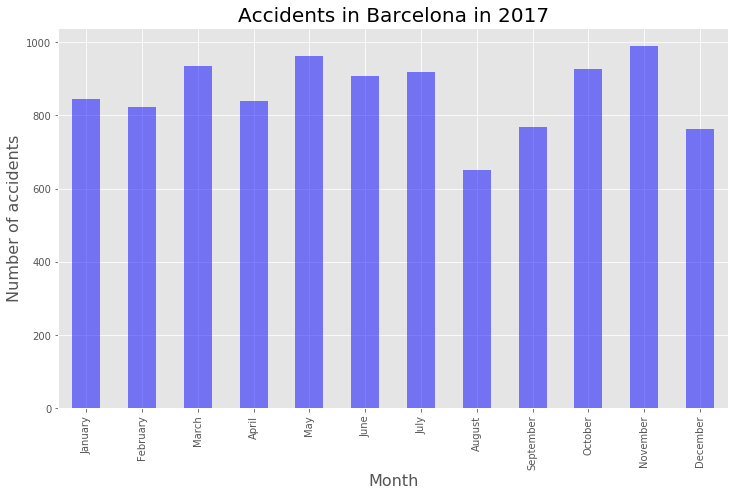

In [145]:
import matplotlib.pyplot as plt
#% matplotlib inline
plt.style.use('ggplot')

# plot accidents per month
accidents_month.plot(kind='bar',figsize=(12,7), color='blue', alpha=.5)

# title and x,y labels
plt.title('Accidents in Barcelona in 2017', fontsize=20)
plt.xlabel('Month',fontsize=16)
plt.ylabel('Number of accidents',fontsize=16);

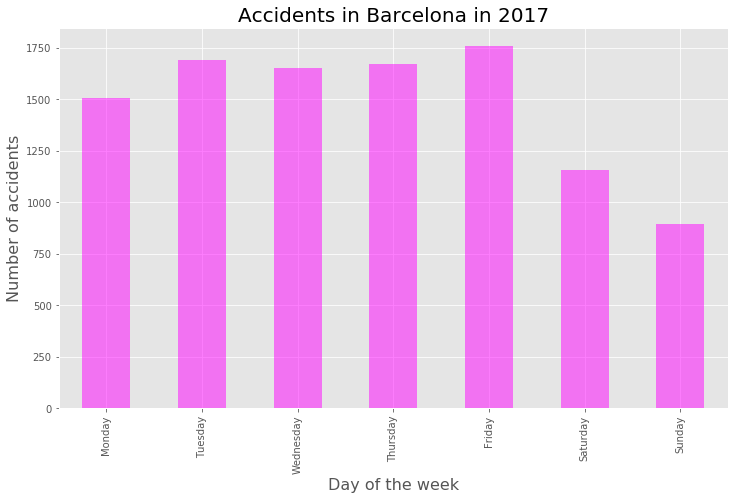

In [19]:
# Number of accident per day of the week
accidents_day = df.groupby(df['date'].dt.dayofweek).count().date

# Replace the day integers by day names.
accidents_day.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
accidents_day.plot(kind='bar',figsize=(12,7), color='magenta', alpha=0.5)

# title and x,y labels
plt.title('Accidents in Barcelona in 2017', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of accidents',fontsize=16);

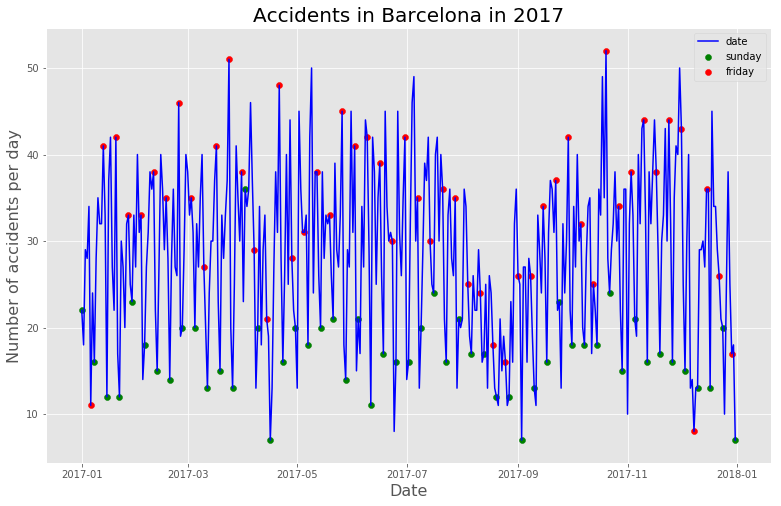

In [20]:
accidents = df.groupby(df['date'].dt.date).count().date

accidents.plot(figsize=(13,8), color='blue')

# sunday accidents
sundays = df.groupby(df[df['date'].dt.dayofweek==6].date.dt.date).count().date
plt.scatter(sundays.index, sundays, color='green', label='sunday')

# friday accidents
friday = df.groupby(df[df['date'].dt.dayofweek==4].date.dt.date).count().date
plt.scatter(friday.index, friday, color='red', label='friday')

# Title, x label and y label
plt.title('Accidents in Barcelona in 2017', fontsize=20)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Number of accidents per day',fontsize=16);
plt.legend()

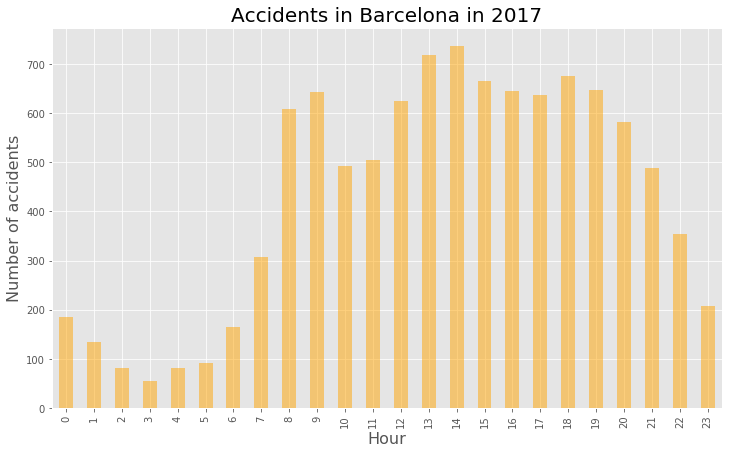

In [21]:
# Number of accident per hour
accidents_hour = df.groupby(df['date'].dt.hour).count().date

# plot accidents per hour
accidents_hour.plot(kind='bar',figsize=(12,7), color='orange', alpha=0.5)

# title and x,y labels
plt.title('Accidents in Barcelona in 2017', fontsize=20)
plt.xlabel('Hour',fontsize=16)
plt.ylabel('Number of accidents',fontsize=16);

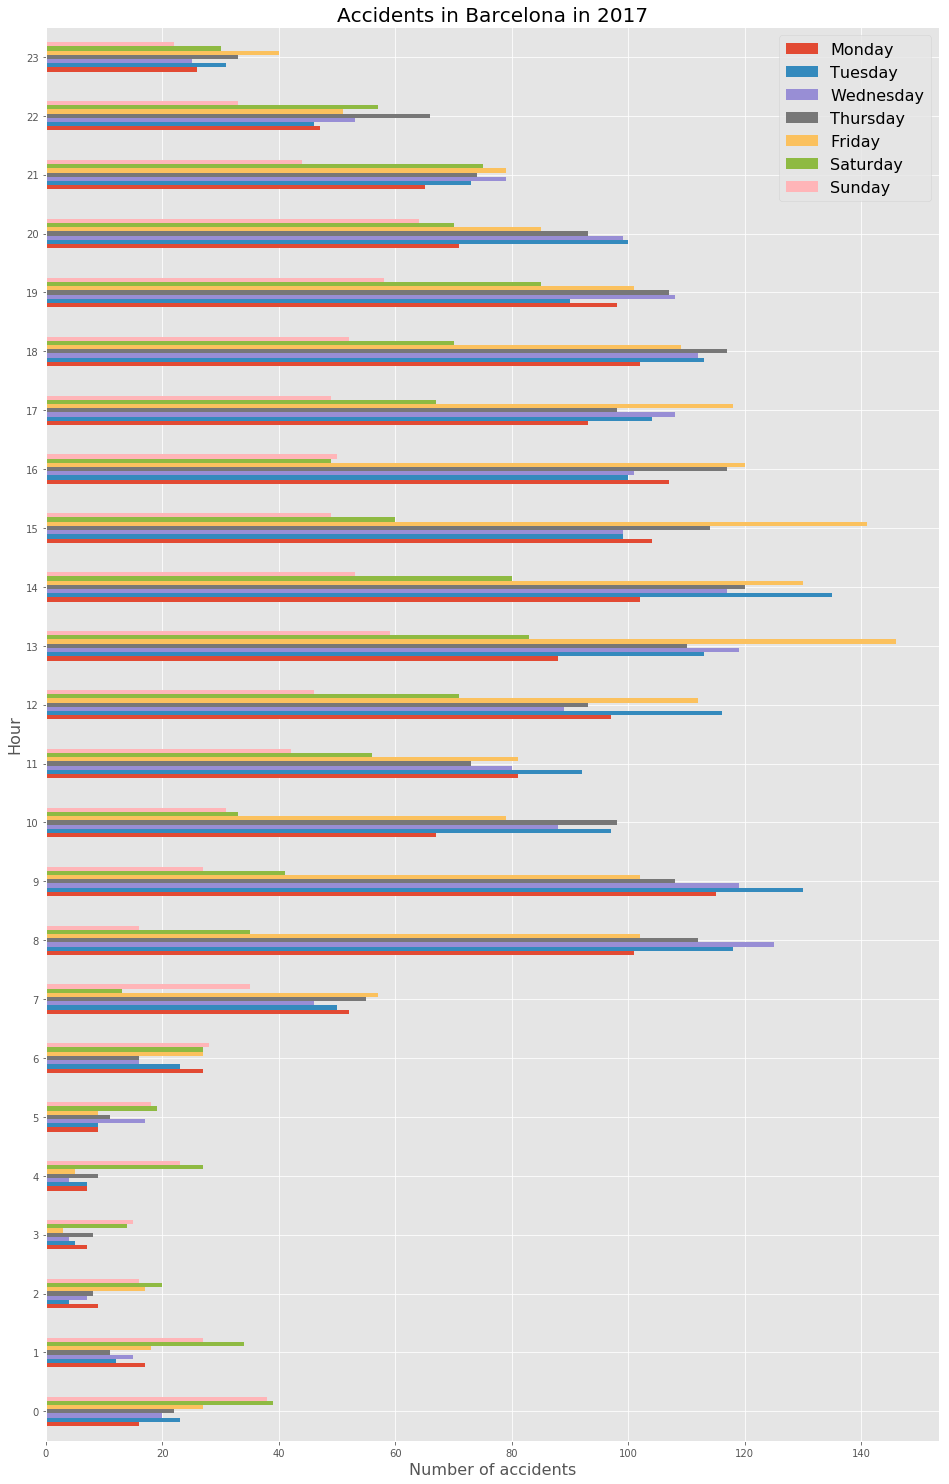

In [149]:
# Number of accident per hour and day
accidents_hour_day = df.groupby([df['date'].dt.hour.rename('hour'),df['date'].dt.dayofweek.rename('day')]).count().date

accidents_hour_day.unstack().plot(kind='barh', figsize=(16,26))

# title and x,y labels
plt.legend(labels=[calendar.day_name[x] for x in range(0,7)],fontsize=16)
plt.title('Accidents in Barcelona in 2017',fontsize=20)
plt.xlabel('Number of accidents',fontsize=16)
plt.ylabel('Hour',fontsize=16);

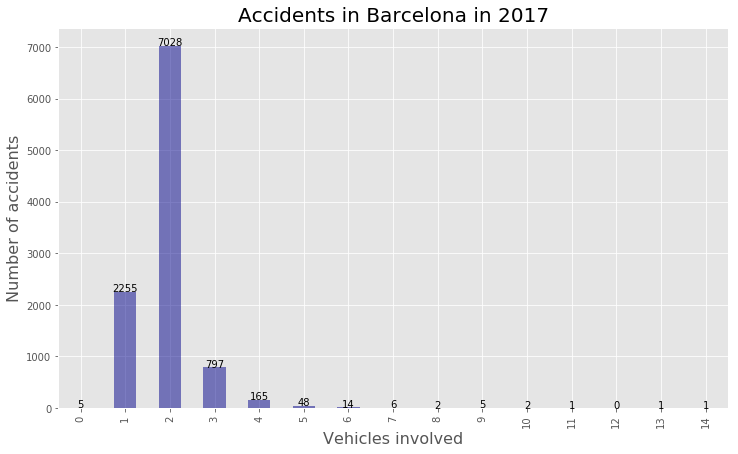

In [152]:
# Compute the number of accidents according to the number of vehicles involved
vehicles_involved = df.vehicles_involved.value_counts()
# There is no car accident with 12 vehicles involved. We include 0 in our Serie for better visualization
vehicles_involved[12]=0

vehicles_involved.sort_index(inplace=True)

# Plot number of car accidents according to the number of vehicles involved
vehicles_involved.plot(kind='bar',figsize=(12,7), color='darkblue', alpha=0.5)

# Title and x,y labels
plt.title('Accidents in Barcelona in 2017',fontsize=20)
plt.xlabel('Vehicles involved',fontsize=16)
plt.ylabel('Number of accidents',fontsize=16);

# Print a label above each bar indicating the number of accidents
for index in vehicles_involved.index:
    plt.text(x=index,y=vehicles_involved.loc[index],s=str(vehicles_involved.loc[index]),horizontalalignment='center')

Text(0, 0.5, '')

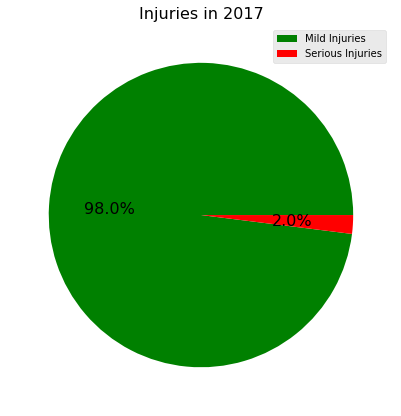

In [24]:
# Serie with number of mild injuries and serious injuries
injuries = df[['mild_injuries','serious_injuries']].sum()

# Pie plot with the percentage of victims with mild and serious injuries
injuries.plot(kind='pie',figsize=(7,7), colors=['green','red'], labels=None, autopct='%1.1f%%', fontsize=16)

# Legend and title
plt.legend(labels=['Mild Injuries', 'Serious Injuries'])
plt.title('Injuries in 2017', fontsize=16)
plt.ylabel('')

In [162]:
[calendar.day_name[x] for x in range(0,7)]
[calendar.month_name[x] for x in range(1,13)]
calendar.weekday(2017,5,17)

2

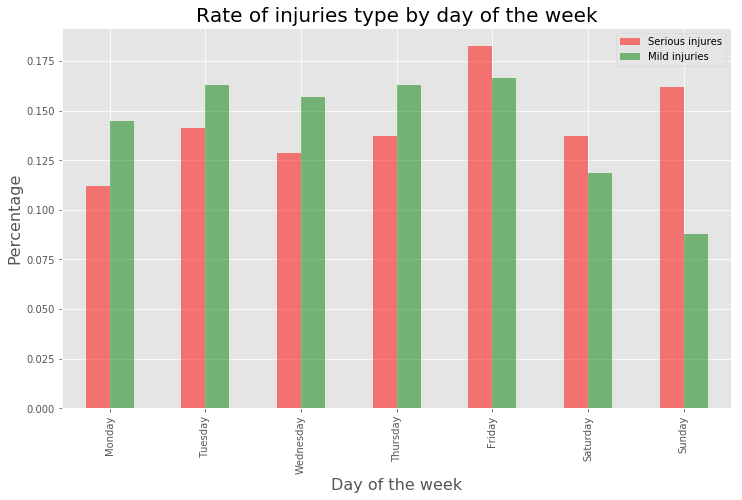

In [163]:
# Number of serious injuries per day of the week
accidents_serious = df[df['serious_injuries']!=0].groupby(df['date'].dt.dayofweek).sum().serious_injuries
# Percentage of serious injuries per day of the week
rate_serious = accidents_serious/accidents_serious.sum()

# Number of mild injuries per day of the week
accidents_mild = df[df['mild_injuries']!=0].groupby(df['date'].dt.dayofweek).sum().mild_injuries
# Percentage of mild injuries per day of the week
rate_mild = accidents_mild/accidents_mild.sum()

# Combine both series as a dataframe in order to plot them as a side by side bar
rates = pd.DataFrame({'Serious injures':rate_serious,'Mild injuries':rate_mild})
rates.plot(kind='bar',figsize=(12,7),color=['red','green'],alpha=0.5)

# Title and labels
plt.title('Rate of injuries type by day of the week',fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Percentage',fontsize=16)
plt.xticks(np.arange(7),[calendar.day_name[x] for x in range(0,7)]);

In [29]:
#!pip install folium

In [28]:
import folium

# Define a map centered around Barcelona
barcelona_map = folium.Map(location=[41.38879, 2.15899], zoom_start=12)

# Display the map
barcelona_map

In [33]:
# Create a map object of the city of Barcelona

barcelona_map= folium.Map(location=[41.38879, 2.15899], zoom_start=12)

# Display only accidents where serious injuries where recorded
for lat, lng, label in zip(df.latitude, df.longitude, df.serious_injuries.astype(str)):
    if label!='0':
        folium.features.CircleMarker(
            [lat, lng],
            radius=3,
            color='red',
            fill=True,
            popup=label,
            fill_color='darkred',
            fill_opacity=0.6
        ).add_to(barcelona_map)
    
# Show map
barcelona_map

AttributeError: module 'folium.features' has no attribute 'CircleMarker'

In [35]:
from folium import plugins

# Create a map object of the city of Barcelona
barcelona_map= folium.Map(location=[41.38879, 2.15899], zoom_start=12)

# Instantiate a mark cluster object for the car accidents
accidents = plugins.MarkerCluster().add_to(barcelona_map)

# Display only accidents where serious injuries where recorded
for lat, lng, label in zip(df.latitude, df.longitude, df.serious_injuries.astype(str)):
    if label!='0':
        folium.Marker(
            location=[lat, lng],
            icon=None,
            popup=label,
        ).add_to(accidents)

# Display map
barcelona_map

In [42]:
hour_list = [[] for _ in range(24)]

In [59]:
#hour_list[0]

In [53]:
print (len(hour_list))
print (len(df))

24
10330


In [60]:
#index

In [50]:
df.head()

,mild_injuries,serious_injuries,victims,vehicles_involved,longitude,latitude,date
id,,,,,,,
2017S008429,2,0,2,2,2.125624,41.340045,2017-10-13 08:00:00
2017S007316,2,0,2,2,2.120452,41.339426,2017-09-01 13:00:00
2017S010210,5,0,5,2,2.167356,41.360885,2017-12-08 21:00:00
2017S006364,1,0,1,2,2.124529,41.337668,2017-07-21 02:00:00
2017S004615,1,0,1,3,2.185272,41.416365,2017-05-25 14:00:00


In [89]:
h = [[] for _ in range(24)]

In [92]:
h.append([1,1])

In [102]:
from folium.plugins import HeatMapWithTime

# Create a map object of the city of Barcelona
barcelona_map= folium.Map(location=[41.38879, 2.15899], zoom_start=12)

# Nested list that contains the latitud and the longitud of the different accidents. 
hour_list = [[] for _ in range(24)]
for lat,log,hour in zip(df.latitude,df.longitude,df.date.dt.hour):
    hour_list[hour].append([lat,log]) 

# Labels indicating the hours
index = [str(i)+' Hours' for i in range(24)]

# Instantiate a heat map wiht time object for the car accidents
HeatMapWithTime(hour_list, index).add_to(barcelona_map)

barcelona_map